In [ ]:
pip install matplotlib

In [ ]:
pip install WordCloud

In [ ]:
pip install seaborn

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from matplotlib.colors import ListedColormap
from collections import Counter
import numpy as np

In [342]:
file = pd.read_csv('/Users/tadeonava/Downloads/dataset_facebook-posts-scraper_2025-03-25_00-34-36-293.csv')
df = pd.DataFrame(file)

/var/folders/lh/k_ftm6zs6s7d3lhpy8ybqnj00000gp/T/ipykernel_67269/1415914952.py:1: DtypeWarning: Columns (87,135,136,138,139,140,141,143,144,145,146,148,149,150,151,153,154,155,156,158,159,160,161,163,164,165,166,168,169,170,171,173,174,175,176,178,179,195,196,229,230,231,233,235,236,241,242,243,244,245,249,250,251,252,253,254,264,265,266,267,268,269,270,271,272,273,274,275,276,277,280,283,284,285,288,292,296,298,301,302,303,305,311,312,313,314,315,316,318,319,320,336,337,338,340,342,343,348,349,350,351,352,354,356,357,358,359,360,361,362,372,373,374,375,376,377,378,379,380,381,382,383,384,385,388,391,392,393,396,400,404,406,407,408,410,411,412,413,415,416,417,418,420,421,422,423,425,426,427,428,430,431,432,433,435,436,437,438,440,441,444,445,446,448,454,455,456,457,458,459,461,462,463,479,480,481,483,485,486,491,492,493,494,495,497,499,500,501,502,503,504,505,515,516,517,518,519,520,521,522,523,524,525,526,527,528,531,534,535,536,539,543,547,549,550,551,553,554,555,556,558,559,560,561,

VARIABLES BASED IN COLUMNS ASSIGNATION


In [ ]:
#localization = df['locationMeta/city']
#comments_c = df['commentsCount']
#username = df['ownerUsername'] #In case analyzing context and not an specific account
timestamp = df['time']
caption = df['text']
#likes_count = df['likes']
#play_count = df['playCount']
#share_count = df['shares']
#duration = df['videoMeta/duration']

'''
#Convertion of YYY-MM-DDTHH:MM:SSSSZ format to YYY-MM-DD(datetime) and HH:MM:SSSS(object)
import pandas as pd

def split_iso_datetime(iso_datetime_string):
    
        #Returns a tuple so, to use the functions a tuple is needed
    
    try:
        # Convert the ISO 8601 string to a Pandas Timestamp
        timestamp = pd.to_datetime(iso_datetime_string)

        # Extract the date and time components
        date_object = timestamp.date()
        time_object = timestamp.time()

        return date_object, time_object

    except ValueError:
        print(f"Invalid datetime string format: {iso_datetime_string}")
        return None, None

# Using function

iso_datetime_string = "2025-03-24T19:12:19.000Z" #The format in CSV. Edit if necessary
date, time = split_iso_datetime(iso_datetime_string)

if date and time:
    print("Date:", date)
    print("Time:", time)


# Create a  Pandas Series (A list)
iso_datetime_series = pd.Series(timestamp)

# Create new Series for date and time
date_series = pd.Series([None] * len(iso_datetime_series))
time_series = pd.Series([None] * len(iso_datetime_series))

# Split each ISO 8601 datetime string in the Series
for index, iso_datetime_string in iso_datetime_series.items():
    date, time = split_iso_datetime(iso_datetime_string)
    date_series[index] = date
    time_series[index] = time

# Convert date series to datetime
date_series = pd.to_datetime(date_series)

#ADD the lists to the DataFrame
df['date'] = date_series
df['time'] = time_series
'''
# Convert 'timestamp' to datetime dtype
df['datetime'] = pd.to_datetime(timestamp, errors='coerce')
print(df['datetime'].dtype) #If datetime64 is ok

KeyError: 'time'

In [ ]:
#Hashtags 

from collections import Counter

def analyze_hashtags(df):
    """
    Analyzes hashtag usage in a DataFrame with columns like 'hashtag/0', 'hashtag/1', ..., 'hashtag/30'.

    Args:
        df (pd.DataFrame): The DataFrame containing the hashtag data.

    Returns:
        Counter: A Counter object containing the frequency of each hashtag.
    """

    hashtag_columns = [f"hashtags/{i}/name" for i in range(31)]  # Create a list of column names. EDIT THE NAME!!!

    all_hashtags = []
    for col in hashtag_columns:
        if col in df.columns:  # Check if the column exists
            all_hashtags.extend(df[col].dropna().tolist())  # Add hashtags to the list

    hashtag_counts = Counter(all_hashtags)  # Count hashtag frequencies
    #RGB codes
    colors = ["#c5b683ff","#68a3daff","#691b33ff"]

    # Crear el colormap personalizado
    custom_colormap = ListedColormap(colors)

    # Generar la wordcloud con el colormap personalizado
    wordcloud = WordCloud(width=800, height=400, background_color="#691b33ff", max_words=50, relative_scaling=1, colormap=custom_colormap).generate_from_frequencies(hashtag_counts)

    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()
    return hashtag_counts

#For just one column
'''
def analyze_hashtags(df):
    hashtag_counts = Counter(df)
    return hashtag_counts
'''

# Analyze the hashtags
hashtag_counts = analyze_hashtags(df)

# Get the most common hashtags
most_common_hashtags = hashtag_counts.most_common()

# Print the top 10 hashtags
print("\nHashtags Frequency:")
for hashtag, count in hashtag_counts.most_common():
    print(f"{hashtag}: {count}")




Top Hashtags:
#LetsHunt: 62
#UFL2024: 20
#GoPanthers: 9
#UFLDraft: 9
#UFLTrainingCamp: 8
#UFL: 5
#KeepProwling: 3
#OnePride: 3
#OnTheClock: 3
#letshunt: 1
#LetsRead: 1
#RareDiseaseDay: 1
#Letshunt: 1
#MLKDay: 1
#VeteransDay: 1
#boltup: 1
#ForTheShoe: 1
#Saints: 1
#Paris2024: 1
#OlympicGames: 1
#FathersDay: 1
#57: 1
#MemorialDay: 1
#26: 1
#TeacherAppreciationWeek: 1
#UFLPANTHERS: 1
#UFLPanthers: 1
#CincoDeMayo: 1
#MayThe4th: 1
#VictoryMonday: 1
#taylorswift: 1
#ttpd: 1
#KnowMyName: 1
#NationalSiblingDay: 1
#tiktok: 1
#jump: 1
#ufl: 1
#fordfield: 1
#giddydown: 1
#GiddyDown: 1
#UFLKickoff: 1
#EasterSunday: 1


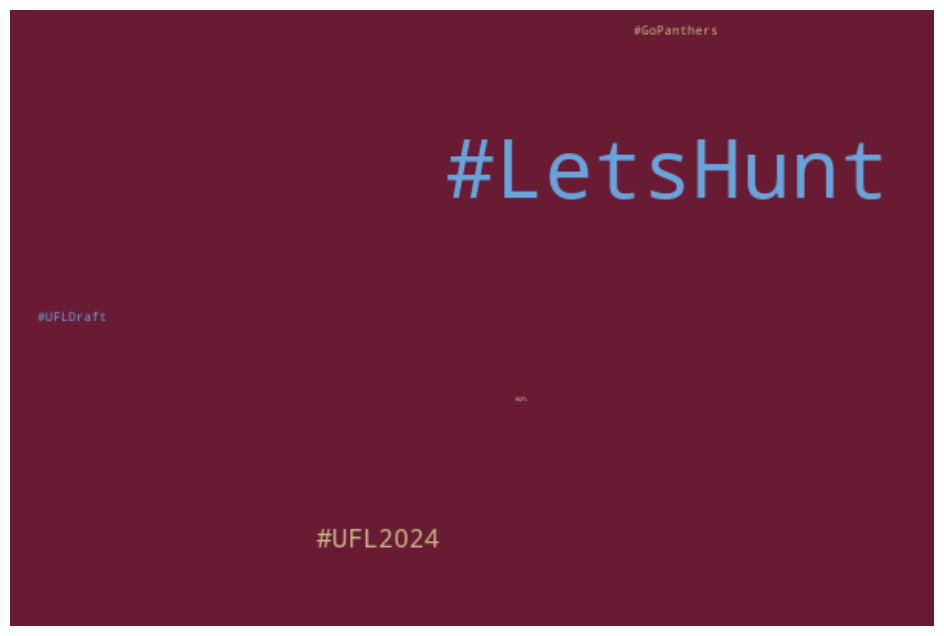

In [305]:
#Extract Hashtags from a string
def extraer_hashtags_y_generar_wordcloud(dataframe,hashtag):
    """
    Extrae hashtags de una columna de un DataFrame y genera una wordcloud.

    Args:
        dataframe (pd.DataFrame): DataFrame que contiene los datos.
    """
    hashtags = []
    for texto in dataframe.astype(str):  # Asegura que sea string
        if isinstance(texto, str):
            hashtags.extend(re.findall(r"#\w+", texto))  # Encuentra hashtags

    # Cuenta la frecuencia de los hashtags
    hashtag_counts = Counter(hashtags)

    print("\nTop Hashtags:")
    for hashtag, count in hashtag_counts.most_common():     
        print(f"{hashtag}: {count}")
                        #RGB codes
    colors = ["#c5b683ff","#68a3daff","#691b33ff"]

    # Crear el colormap personalizado
    custom_colormap = ListedColormap(colors)

    # Generar la wordcloud con el colormap personalizado

    wordcloud = WordCloud(width=600, height=400, background_color="#691b33ff", max_words=50, relative_scaling=1, colormap=custom_colormap).generate_from_frequencies(hashtag_counts)


    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()
    return 

all_hashtags = 0
extraer_hashtags_y_generar_wordcloud(caption,all_hashtags)



In [152]:
#Locations with most posts
localization.value_counts().head(20)

locationMeta/city
Detroit        19
San Antonio     3
Santa Anna      1
Memphis         1
Name: count, dtype: int64

count    414.000000
mean       9.884058
std       46.396450
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max      750.000000
Name: commentCount, dtype: float64


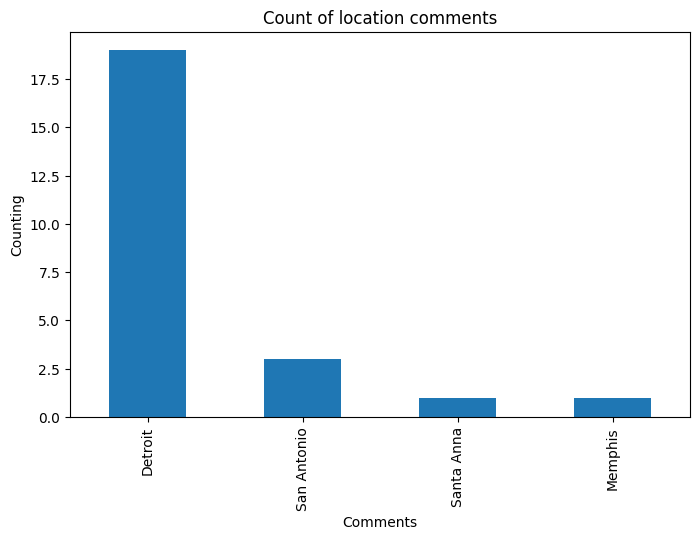

In [173]:
import matplotlib.pyplot as plt

# Counting frequency in "comments"
comment_counts = localization.value_counts().head(15)

#Describe of comments, to measure comment reach
print(comments.describe())

# Create plot
plt.figure(figsize=(8, 5))  # Adjust size
comment_counts.plot(kind='bar')
plt.xlabel('Comments')
plt.ylabel('Counting')
plt.title('Count of location comments')
plt.show()

In [271]:
import pandas as pd
import re

def calculate_hashtag_usage_rate(df):
    """
    Calculates the rate at which hashtags are used in a DataFrame with a 'comments' column.

    Args:
        df (pd.DataFrame): The DataFrame containing the comments data.

    Returns:
        float: The rate of hashtag usage (percentage of posts containing hashtags).
    """

    # Function to find hashtags in a string
    def find_hashtags(text):
        if isinstance(text, str):
            return re.findall(r"#\w+", text)  # Find hashtags (words starting with #)
        else:
            return []

    # Apply the function to the 'comments' column to find hashtags in each comment
    df['hashtags_found'] = caption.apply(find_hashtags)

    # Count the number of posts that contain hashtags
    posts_with_hashtags = df['hashtags_found'].apply(len) > 0
    num_posts_with_hashtags = posts_with_hashtags.sum()

    # Calculate the hashtag usage rate
    total_posts = len(df)
    hashtag_usage_rate = (num_posts_with_hashtags / total_posts) * 100

    return hashtag_usage_rate



# Calculate the hashtag usage rate
usage_rate = calculate_hashtag_usage_rate(df)

# Print the result
print(f"Hashtag Usage Rate: {usage_rate:.2f}%")

Hashtag Usage Rate: 9.83%


DATES TREATEMENT

In [ ]:
year = df['date'].dt.year
month = df['date'].dt.month
day = df['date'].dt.day

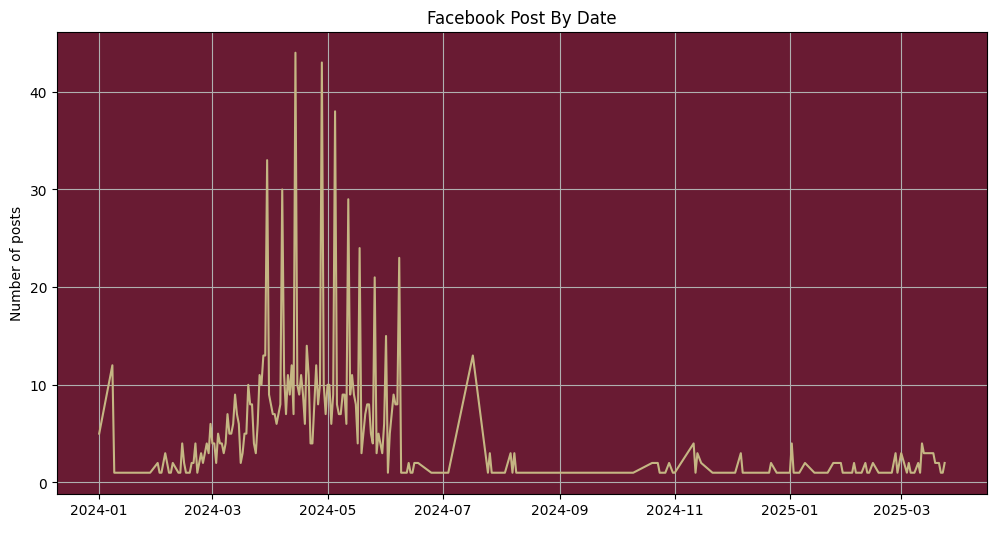

In [292]:
#Make sure of the NAME of column with datetime data

# Group by date and count posts
publicaciones_por_fecha = df.groupby(df['datetime'].dt.date).size() #Se puede usar dt.hour o dt.week para agrupar por hora o semana.

#Just to confirm correct execution
#print(publicaciones_por_fecha)
["#c5b683ff","#68a3daff","#691b33ff"]
# Lines plot
plt.figure(figsize=(12, 6))
publicaciones_por_fecha.plot(kind='line', color="#c5b683ff") #Usar kind='bar' para gráfico de barras.
plt.title('Facebook Post By Date',color = 'black')
plt.xlabel('Date', color='white')
plt.ylabel('Number of posts', color='black')
plt.gca().set_facecolor("#691b33ff")
plt.grid(True)
plt.show()

umbral = publicaciones_por_fecha.mean() + publicaciones_por_fecha.std() #Un ejemplo de umbral, puedes ajustarlo según tus datos.
picos = publicaciones_por_fecha[publicaciones_por_fecha > umbral]
#print('Fechas con picos de actividad:')
#print(picos)


USERS TREATEMENT

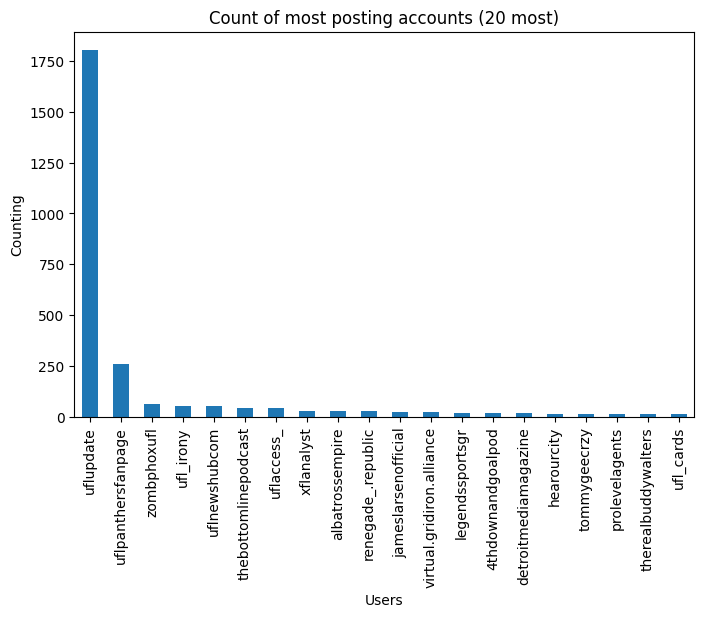

In [158]:
user_counts = username.value_counts().head(20)

# Create plot
plt.figure(figsize=(8, 5))  # Adjust size
user_counts.plot(kind='bar')
plt.xlabel('Users')
plt.ylabel('Counting')
plt.title('Count of most posting accounts (20 most)')
plt.show()



In [139]:
is_video.value_counts()

isVideo
False    670
True     574
Name: count, dtype: int64

In [176]:
likes_count.describe()

count     1210.000000
mean       190.914876
std        741.639905
min          3.000000
25%         36.000000
50%         65.000000
75%        130.750000
max      14185.000000
Name: likes, dtype: float64

In [178]:
comments_c.describe()

count    1063.000000
mean       11.801505
std        24.983405
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       391.000000
Name: comments, dtype: float64

In [180]:
share_count.describe()


count    1210.000000
mean       17.033058
std        51.160047
min         0.000000
25%         3.000000
50%         7.000000
75%        14.000000
max       813.000000
Name: shares, dtype: float64

comments = df['commentCount']
timestamp = df['createdAt']
caption = df['caption']
likes_count = df['likeCount']
is_video = df['isVideo']

In [182]:
play_count.describe()

count    4.140000e+02
mean     1.242270e+04
std      9.386876e+04
min      5.000000e+01
25%      7.705000e+02
50%      1.229500e+03
75%      3.068000e+03
max      1.700000e+06
Name: playCount, dtype: float64

In [194]:
t = df['likesCount']
t.sum()

np.float64(1686826.0)

In [ ]:
#Heatmap 
#Consider the sample size and variability to be sure that output is representative 

numeric_df = df[['commentCount', 'diggCount', 'playCount', 'shareCount', 'videoMeta/duration']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables de TikTok')
plt.show()

KeyError: "None of [Index(['commentCount', 'diggCount', 'playCount', 'shareCount',\n       'videoMeta/duration'],\n      dtype='object')] are in the [columns]"